Визуализация полного дерева занимает примерно 15 минут, поэтому лучше запускать локально (необходимо раскомитить строчки: # Визуализация итогового (ПОЛНОГО) дерева решений с Gini и # Визуализация итогового (ПОЛНОГО) дерева решений с Entropy).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Средняя точность модели с Gini: 0.9946


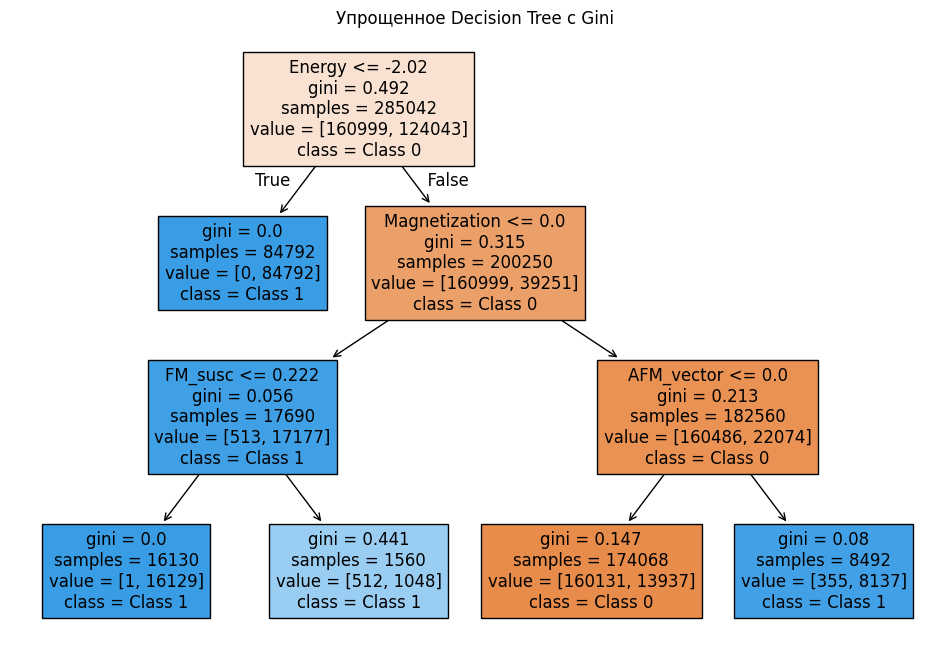

Средняя точность модели с Entropy: 0.9951


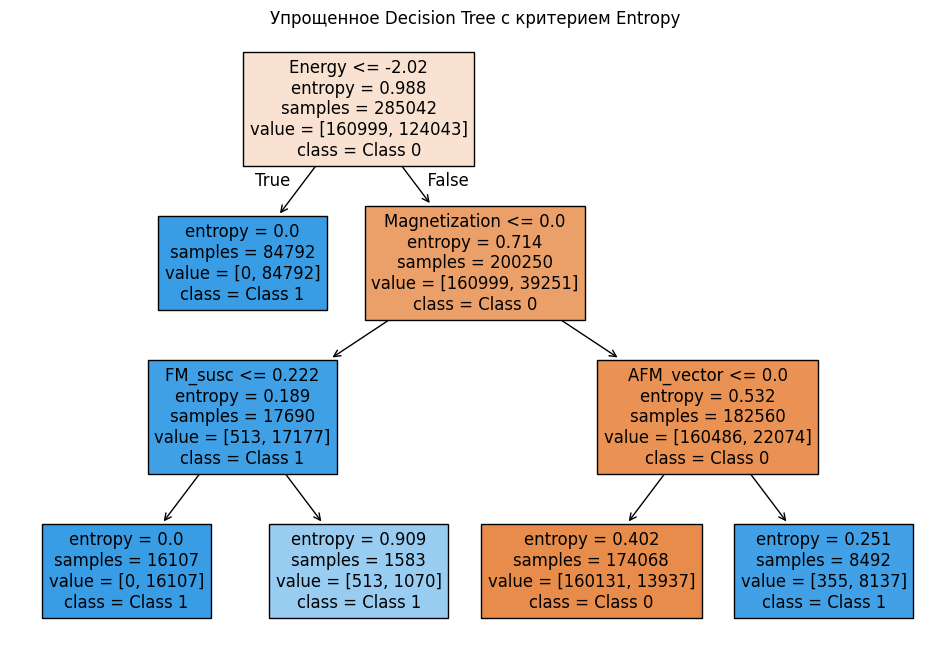

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AI_phase_diagram/Final_version/data/Main_Data_Model_0_2_320_Samples.csv', delimiter=';')

# Разделение данных
y = data["Class"]
X = data[["Energy", "Specific_Heat", "Magnetization", "FM_susc", "AFM_vector", "AFM_susc"]]

# Создание стратифицированных фолдов
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Кросс-валидация для модели с Gini
clf_gini = DecisionTreeClassifier(criterion='gini')
scores_gini = cross_val_score(clf_gini, X, y, cv=skf)
print(f"Средняя точность модели с Gini: {scores_gini.mean():.4f}")

# Обучение финальной модели на всех данных (Gini)
clf_gini.fit(X, y)

# # Визуализация итогового (ПОЛНОГО) дерева решений с Gini
# plt.figure(figsize=(12, 8))
# tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
# plt.title('Decision Tree (обученное на всех данных) с Gini')
# plt.show()

# Упрощенное дерево с глубиной 3 (Gini)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_gini.fit(X, y)

# Визуализация упрощенного дерева решений с Gini
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Упрощенное Decision Tree с Gini')
plt.show()

# Кросс-валидация для модели с Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
scores_entropy = cross_val_score(clf_entropy, X, y, cv=skf)
print(f"Средняя точность модели с Entropy: {scores_entropy.mean():.4f}")

# Обучение финальной модели на всех данных (Entropy)
clf_entropy.fit(X, y)

# # Визуализация итогового (ПОЛНОГО) дерева решений с Entropy
# plt.figure(figsize=(12, 8))
# tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
# plt.title('Decision Tree (обученное на всех данных) с Entropy')
# plt.show()

# Упрощенное дерево с глубиной 3 (Entropy)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_entropy.fit(X, y)

# Визуализация упрощенного дерева решений с критерием Entropy
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Упрощенное Decision Tree с критерием Entropy')
plt.show()